# Óptica Geométrica

In [1]:
%matplotlib inline

from numpy import sin, cos
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

## Lei de Snell: $ n_i \sin \theta_i = n_r \sin \theta_r$

In [2]:
#Medidas Experimentais
tetha_i=np.array([0, 10, 20, 30, 40])
tetha_r=np.array([0, 8, 18, 24, 36])
etetha_r=np.array([1, 1.5, 1, 1.5, 1.7])
x=np.sin(tetha_i/180.0*np.pi)
y=np.sin(tetha_r/180.0*np.pi) 
ey=np.cos(tetha_r/180.0*np.pi) * etetha_r /180.0*np.pi
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("declive:%g" %slope)
print("intercept:%g V" %intercept)

declive:0.893547
intercept:-0.00783919 V


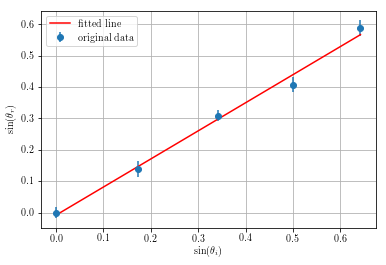

In [3]:
plt.errorbar(x, y,  yerr=ey, fmt='o', label='original data')
xt=np.array([0, x[-1]])

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.plot(xt, intercept + slope*xt, 'r', label='fitted line')
plt.xlabel(r'$\sin (\theta_i)$')
plt.ylabel(r'$\sin (\theta_r)$')
plt.grid()
#plt.ylabel(r'\textbf{time} (s)')

plt.legend()
plt.show()

In [4]:
def focosConj(f,do):
    xo=do-f
    xi=f/xo
    di=f+xi
    A=-di/do
    return di,A

In [5]:
fc=1
dObj=1.5
dIm,Amp =focosConj(fc,dObj)
print("DObj=%g, DIm=%g, Ampl=%g" %(dObj,dIm,Amp ))

DObj=1.5, DIm=3, Ampl=-2


<IPython.core.display.Javascript object>


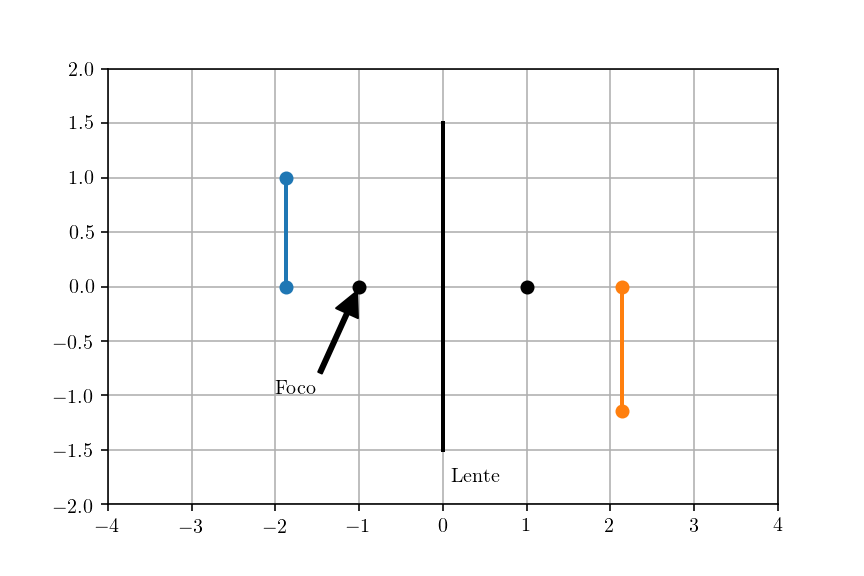

interactive(children=(FloatSlider(value=2.049, description='do', max=4.0, min=0.1, step=0.001), Output()), _dom_classes=('widget-interact',))

In [7]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-4, 4), ylim=(-2, 2))
ax.grid()

lineO, = ax.plot([], [], '-o', lw=2)
lineI, = ax.plot([], [], '-o', lw=2)
ax.text(0.1, -1.8, r'Lente', fontsize=10)

#distancia focal
f=1.0
line1, = ax.plot([0,0], [-1.5, 1.5], 'k-', lw=2)
ax.plot([f,-f], [0,0], 'ko')
ax.annotate(r'Foco', xy=(-f, 0), xytext=(-(f+1), -1),
            arrowprops=dict(facecolor='black',width =2, shrink=0.05))


def plotLentes(do):
#    thisx = [0, 0]
#    thisy = [-1.9, 1.9]
#    line1.set_data(thisx, thisy)
    thisx = [-do, -do]
    thisy = [0, 1]
    lineO.set_data(thisx, thisy)
    di,A =focosConj(f,do)
    thisx = [di, di]
    thisy = [0, A]
    lineI.set_data(thisx, thisy)
    fig.show()

widgets.interact(plotLentes, do=(0.1,4.0,0.001));

## Associação de lentes delgadas

$$\frac{1}{f_{equiv}}= \frac{1}{f_1} + \frac{1}{f_2} -\frac{D}{ f_1 f_2}$$

$$ \frac{1}{f_{equiv}}= \frac{1}{f_1} + \frac{1}{f_2}(1 -\frac{D}{ f_1})$$

$$ \frac{1}{f_{equiv}} - \frac{1}{f_1} =  \frac{1}{f_2}(1 -\frac{D}{ f_1})$$

$$ \frac{1}{f_{2}}=  \frac{\frac{1}{f_{equiv}} -\frac{1}{f_1}} {1 -\frac{D}{ f_1} }$$

$$ {f_{2}}=  \frac{1 -\frac{D}{ f_1} }{\frac{1}{f_{equiv}} -\frac{1}{f_1}} $$

$$ {f_{2}}=  \frac{f_1 -D }{\frac{f_1} {f_{equiv}} -1} $$

In [8]:
D=0.01
f1=0.075
f2=-0.150
feq =1.0/ ( 1/f1 + 1/f2 - D/(f1*f2))
feq

0.1323529411764706

In [9]:
(f1-D)/(f1/feq -1)

-0.15

## Cálculo de Incertezas

In [10]:
import sympy as sp
#from scipy.misc import derivative
from sympy.parsing.sympy_parser import parse_expr
# 
eqFoco='(f1 - D)/(f1/feq - 1)'
f1, D, feq = sp.symbols('f1 D feq')
dPf1 = sp.diff(eqFoco, f1)
print(sp.simplify(dPf1))
dPD = sp.diff(eqFoco, D)
print(sp.simplify(dPD))
dPfeq = sp.diff(eqFoco, feq)
print(sp.simplify(dPfeq))

feq*(D - feq)/(f1 - feq)**2
-feq/(f1 - feq)
-f1*(D - f1)/(f1 - feq)**2
